## 6.3 梯度下降
通过本章前两节的学习，我们已经清晰地了解深度学习模型参数的求解时通过先确定损失函数，然后通过最优化算法逐步逼近得到的。这个过程也常常被称为参数估计（Parameter Estimation）。优化算法有很多种，其中最基础也是常用的是梯度下降法。它是基于最小化损失函数来进行更新参数的。

### 6.3.1 梯度下降的基本思想

在使用梯度下降法时，我们需要计算损失函数的梯度。梯度的方向是参数的最佳修改方向，因此我们可以使用梯度的方向来更新参数，从而最小化损失函数。具体来说，在每一步迭代中，梯度下降法会根据当前参数计算损失函数的梯度，然后沿着梯度的反方向更新参数。这样做能使损失函数的值不断减小，直到达到最小值为止。这个过程中参数的更新规则如下：

$$ \theta = \theta - \alpha \cdot \nabla_{\theta} L $$

在这里，$\theta$ 是要被更新的参数，$\alpha$ 是学习率，$\nabla_{\theta} L$ 是损失函数 $L$ 关于参数 $\theta$ 的梯度。

### 6.3.2 学习率

学习率 $\alpha$ 是梯度下降法的一个重要超参数。它决定了每一步迭代中参数的更新幅度，也就是说，它决定了梯度下降法的收敛速度。如果 $\alpha$ 设置得太大，那么每一步迭代中参数的更新幅度就会变得很大，这可能会导致梯度下降法无法收敛；如果 $\alpha$ 设置得太小，那么每一步迭代中参数的更新幅度就会变得很小，这可能会导致梯度下降法的收敛速度变慢。因此，我们需要合理地设置 $\alpha$ 的值，以保证梯度下降法能够快速收敛。



### 6.3.3 代码示例

这么说还不够直观，咱们来看两个实际的例子帮助你的理解。

先来看一个简单的一维函数梯度下降法找最小值。假设我们要寻找函数 $y=ax^2+bx+c$ 的最小值，其中 $a,b,c$ 是常数。我们可以使用梯度下降算法来实现这个目标。在梯度下降算法中，我们会不断地迭代更新 $x$ 的值，使得函数的值越来越小。具体来说，每次迭代时，我们会根据函数的导数的值来调整 $x$ 的值。具体来说，我们可以使用如下的公式来更新 $x$ 的值：

$$x_{i+1} = x_i - \alpha \frac{dy}{dx}$$

其中，$\alpha$ 是学习率，表示每次迭代时 $x$ 的步长。$\frac{dy}{dx}$ 表示函数的导数，它可以帮助我们确定 $x$ 的更新方向。

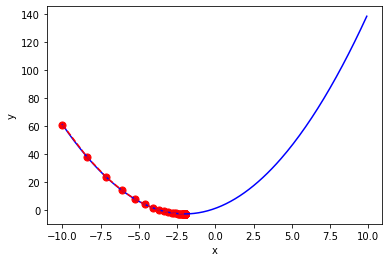

最终参数值：-2.000000476837158


In [1]:
import os
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import torch

# 定义函数
def f(x):
    return x ** 2 + 4 * x + 1

# 定义初始值
x = torch.tensor(-10., requires_grad=True)

# 记录每一步的值
xs = []
ys = []

# 迭代更新参数
learning_rate = 0.1
for i in range(100):
    # 计算预测值和损失
    y = f(x)

    # 记录参数和损失
    xs.append(x.item())
    ys.append(y.item())

    # 反向传播求梯度
    y.backward()

    # 更新参数
    with torch.no_grad():
        x -= learning_rate * x.grad

        # 梯度清零
        x.grad.zero_()

    

        
# 显示真实的函数曲线
x_origin = torch.arange(-10, 10, 0.1)
y_origin = f(x_origin)
plt.plot(x_origin, y_origin,'b-')

# 绘制搜索过程
plt.plot(xs,ys,'r--')
plt.scatter(xs, ys, s=50, c='r')  # 圆点大小为 50，颜色为红色
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# 打印结果
print(f'最终参数值：{x.item()}')


更改学习率，你可以看到不同的搜索过程。比如调大到0.7，可以看到下面这样的图像。可以看出，过大的学习率可能导致优化算法很难收敛，来回乱跳。

<img src="../images/6-3-1.png" width="40%"></img>

但学习率是不是越小越好呢？当然也不是，过小会导致搜索速度太慢。因此合适的学习率对于梯度下降算法是十分重要的。

再来看一个更加复杂一点的二维函数使用梯度下降法搜索最小值的例子。假设一个二维函数$z = x^2 + 2y^2$，梯度下降法中，我们通常使用如下的公式来更新参数：

$$x_{i+1} = x_i - \alpha \frac{\partial z}{\partial x}$$

$$y_{i+1} = y_i - \alpha \frac{\partial z}{\partial y}$$

其中，$x$ 和 $y$ 分别表示自变量，$z$ 表示因变量，$\frac{\partial z}{\partial x}$ 和 $\frac{\partial z}{\partial y}$ 分别表示偏导数。

这样，我们就可以使用二维函数梯度下降法来最小化目标函数了。来看一下它的代码实现。

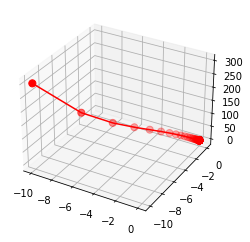

最终参数值：x=-2.0370367614930274e-09, y=-6.533180924230175e-22


/usr/local/lib/python3.8/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


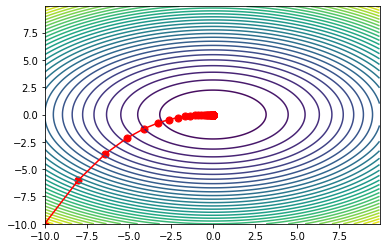

In [3]:
import torch
import matplotlib.pyplot as plt

# 定义函数
def f(x, y):
    return x ** 2 + 2* y ** 2

# 定义初始值
x = torch.tensor(-10., requires_grad=True)
y = torch.tensor(-10., requires_grad=True)

# 记录每一步的值
xs = []
ys = []
zs = []

# 迭代更新参数
learning_rate = 0.1
for i in range(100):
    # 计算预测值和损失
    z = f(x, y)

    # 记录参数和损失
    xs.append(x.item())
    ys.append(y.item())
    zs.append(z.item())

    # 反向传播
    z.backward()

    # 更新参数
    x.data -= learning_rate * x.grad
    y.data -= learning_rate * y.grad

    # 清空梯度
    x.grad.zero_()
    y.grad.zero_()

# 绘制图像
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(xs, ys, zs, 'r-')
ax.scatter(xs, ys, zs, s=50, c='r')  # 圆点大小为 50，颜色为红色

plt.show()

# 打印结果
print(f'最终参数值：x={x.item()}, y={y.item()}')


# 绘制原始的二维函数图像
X, Y = torch.meshgrid(torch.arange(-10, 10, 0.1), torch.arange(-10, 10, 0.1))
Z = f(X, Y)
plt.contour(X, Y, Z, levels=30)

# 绘制搜索过程曲线
plt.plot(xs, ys, 'r-')
plt.scatter(xs, ys, s=50, c='r')  # 圆点大小为 50，颜色为红色
plt.show()



在上面例子中，我们分别在3D坐标系和二维等高线图像上可视化的显示了梯度下降法的搜索过程。你也可以调整学习率，感受一下其中的变化。

### 6.3.4 怎么调整学习率

通过上面的例子，我们可以看出在深度学习中，学习率是调整权重更新幅度的重要超参数。如果学习率过大，那么权重会更新得过快，容易跳过最优解；如果学习率过小，那么权重更新会变得很慢，需要更多的时间才能收敛到最优解。那问题来了，该怎么调整这个参数呢？

常用的方法有：

1. 使用固定的学习率：这种方法简单，但是在不同的训练数据上可能需要调整不同的学习率。

2. 学习率衰减（learning rate decay）：在训练的过程中随着时间的推移，逐渐减小学习率。常用的方法有指数衰减和正则衰减。

3. 动态调整学习率：使用优化算法，根据模型的训练情况动态调整学习率。常用的优化算法有 Adam，RMSProp 和 Adagrad。

4. 手动调整学习率：在训练的过程中手动调整学习率，通常是在验证集上表现不佳时减小学习率，或者在训练集上表现较好时增大学习率。

这里我们先给你罗列了一些常用的方法，具体它们都是什么样的，原理和细节等更多方面的知识就涉及到了深度学习的进阶课程。如果你感兴趣，欢迎加入学习（**微信：gengzhige99**）,回复“**我想学深度学习进阶课程**”。

### 6.3.5 还有比梯度下降法更好的优化算法吗？

当然有。但是到底什么是“好”有不同的标准，更要看具体情况。梯度下降法是通过不断迭代来寻找函数的最小值的方法，其基于最速下降的思想。在每次迭代中，梯度下降法只需要计算函数的梯度，因此在计算上比较简单。梯度下降法的收敛速度通常比较慢，但是它更加稳定，在很多情况下都能够找到最优解。在实际应用中，我们通常会采用梯度下降法。但是，如果函数的形态比较复杂，或者计算函数的梯度的代价很高，那么我们就可能会选择使用牛顿法。

牛顿法是通过不断迭代来寻找函数的最小值的方法，其基于二次近似的思想。在每次迭代中，牛顿法需要计算函数的雅可比矩阵，这使得它在计算上比较复杂，但是如果满足一定条件，牛顿法的收敛速度通常会比梯度下降法要快。这方面的内容超出了本课程的范围。如果你感兴趣，可以自行选修。

**梗直哥提示：本节我们简要介绍了梯度下降法的基本原理和相关知识，侧重入门和代码展示，对其中的数学推导和细节限于篇幅原因讲述的可能没有那么深入。如果你希望更加细致、彻底的了解这种极其重要的方法，欢迎选修我们的前导课程：[“解一卷而众篇明”之机器学习核心概念精讲](https://aay.xet.tech/s/2TMAev)**

[Next 6-4 随机梯度下降法](./6-4%20随机梯度下降法.ipynb)